In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string
import operator

%matplotlib inline

In [2]:
PATH = '..\\yelp_labelled.txt'
names=['sentence', 'positive']
df = pd.read_table(PATH, header=None, names=names)
df.head()

,sentence,positive
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [3]:
sns.set_style('white')

keywords = ['great', 'good', 'back', 'delicious', 'tasty', 'nice']
for key in keywords:
    df[str(key)] = df.sentence.str.contains(
    ' ' + str(key) + ' ',
    case=False
    )
df['positive'] = (df['positive'] == 1)
df.head()

,sentence,positive,great,good,back,delicious,tasty,nice
0,Wow... Loved this place.,True,False,False,False,False,False,False
1,Crust is not good.,False,False,False,False,False,False,False
2,Not tasty and the texture was just nasty.,False,False,False,False,False,True,False
3,Stopped by during the late May bank holiday of...,True,False,False,False,False,False,False
4,The selection on the menu was great and so wer...,True,True,False,False,False,False,False


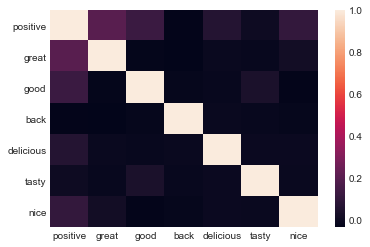

In [4]:
sns.heatmap(df.corr())
plt.show()

In [5]:
data = df[keywords]
target = df['positive']

from sklearn.naive_bayes import BernoulliNB

# Instantiate our model as bnb
bnb = BernoulliNB()

# Use the Fit method
bnb.fit(data, target)

# Make predictions, and store the result in y_pred
y_pred = bnb.predict(data)

# Display the results
print("Number of mislabeled points out of a total {} points : {}".format(
    data.shape[0],
    (target != y_pred).sum()
))

Number of mislabeled points out of a total 1000 points : 419


In [6]:
# Okay so that is all pretty much just copied and pasted from the curriculum.
# It barely go 60% correct. Let's see which words appear most often in good reviews

In [40]:
buzzwords = {}
for each in df[df['positive']]['sentence']:
    each = each.replace('.', '').replace('!', '').split(' ')
    for word in each:
        if word in buzzwords:
            buzzwords[word] = buzzwords[word] + 1
        else:
            buzzwords[word] = 1

sorted_list = sorted(buzzwords.items(), key=operator.itemgetter(1))

In [41]:
sorted_list

[('late', 1),
 ('May', 1),
 ('bank', 1),
 ('holiday', 1),
 ('Rick', 1),
 ('Steve', 1),
 ('prompt', 1),
 ('Cape', 1),
 ('Cod', 1),
 ('ravoli,', 1),
 ('chicken,with', 1),
 ('cranberrymmmm', 1),
 ('Highly', 1),
 ('cute', 1),
 ('less', 1),
 ('interior', 1),
 ('performed', 1),
 ("That's", 1),
 ('rightthe', 1),
 ('red', 1),
 ('velvet', 1),
 ('cakeohhh', 1),
 ('hole', 1),
 ('street', 1),
 ('tacos,', 1),
 ('combos', 1),
 ('burger,', 1),
 ('fries,', 1),
 ('23', 1),
 ('decent', 1),
 ('accident', 1),
 ('happier', 1),
 ('redeeming', 1),
 ('inexpensive', 1),
 ('Ample', 1),
 ('Hiro', 1),
 ('delight', 1),
 ('positive', 1),
 ('note,', 1),
 ('provided', 1),
 ('prime', 1),
 ('rib', 1),
 ('section', 1),
 ('beef,', 1),
 ('Firehouse', 1),
 ('tasty,', 1),
 ('pita', 1),
 ('refreshing', 1),
 ('pink', 1),
 ('char', 1),
 ('running', 1),
 ('after', 1),
 ('realized', 1),
 ('husband', 1),
 ('sunglasses', 1),
 ('chow', 1),
 ('mein', 1),
 ('itfriendly', 1),
 ('servers,', 1),
 ('imaginative', 1),
 ('power', 1),
 ('sc